<div style="float:left">
    <h1 style="width:600px">CASA0002: Urban Simulation</h1>
    <h3 style="width:600px">Individual Assessment</h3>
    <h3 style="width:600px">Author: LINHAN CAO</h3>
    <h3 style="width:600px">Student ID: 21039544</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Part 1: London’s underground resilience
### I. Topological network
#### I.1. Centrality measures:

In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

E:\Anaconda\envs\envGEOG0115\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
import pandas as pd

# Read in the edgelist file from csv
London_network = pd.read_csv("london_flows.csv")
# Print data (first five rows)
London_network.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [3]:
London_clean = London_network.drop( index = London_network.flows[London_network.flows == 0].index )
London_clean = London_clean.drop( index = London_clean.distance[London_clean.distance == 0].index )
London_clean.head()

,station_origin,station_destination,flows,population,jobs,distance
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph object
lon_flows = nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination','flows')

lon= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')

lon1= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon2= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon3= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon4= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon5= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon6= nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')


In [5]:
# Print information about the Graph
print(nx.info(lon_flows))

Graph with 398 nodes and 27165 edges


In [6]:
# Print information about the Graph
print(nx.info(lon))

Graph with 398 nodes and 27165 edges


In [7]:
# To check edges attributes:
list(lon_flows.edges(data = True))[0:10]


[('Abbey Road', 'Beckton', {'flows': 1}),
 ('Abbey Road', 'Blackwall', {'flows': 3}),
 ('Abbey Road', 'Canary Wharf', {'flows': 2}),
 ('Abbey Road', 'Canning Town', {'flows': 5}),
 ('Abbey Road', 'Crossharbour', {'flows': 1}),
 ('Abbey Road', 'Cutty Sark', {'flows': 2}),
 ('Abbey Road', 'Cyprus', {'flows': 7}),
 ('Abbey Road', 'Devons Road', {'flows': 1}),
 ('Abbey Road', 'East India', {'flows': 2}),
 ('Abbey Road', 'Island Gardens', {'flows': 2})]

In [8]:
list(lon.edges(data = True))[0:10]

[('Abbey Road', 'Beckton', {}),
 ('Abbey Road', 'Blackwall', {}),
 ('Abbey Road', 'Canary Wharf', {}),
 ('Abbey Road', 'Canning Town', {}),
 ('Abbey Road', 'Crossharbour', {}),
 ('Abbey Road', 'Cutty Sark', {}),
 ('Abbey Road', 'Cyprus', {}),
 ('Abbey Road', 'Devons Road', {}),
 ('Abbey Road', 'East India', {}),
 ('Abbey Road', 'Island Gardens', {})]

In [9]:
# To check node attributes:
list(lon_flows.nodes(data = True))[0:10]

[('Abbey Road', {}),
 ('Beckton', {}),
 ('Blackwall', {}),
 ('Canary Wharf', {}),
 ('Canning Town', {}),
 ('Crossharbour', {}),
 ('Cutty Sark', {}),
 ('Cyprus', {}),
 ('Devons Road', {}),
 ('East India', {})]

### __Degree centrality__

In [10]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon)

# Print degree as list: 
list(deg_lon)[0:10]

[('Abbey Road', 29),
 ('Beckton', 39),
 ('Blackwall', 38),
 ('Canary Wharf', 297),
 ('Canning Town', 280),
 ('Crossharbour', 41),
 ('Cutty Sark', 41),
 ('Cyprus', 36),
 ('Devons Road', 40),
 ('East India', 43)]

In [11]:
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]


[('Stratford', 341),
 ('Bank and Monument', 299),
 ('Canary Wharf', 297),
 ('Liverpool Street', 297),
 ('Whitechapel', 285),
 ('Canning Town', 280),
 ('Canada Water', 275),
 ('Bethnal Green', 267),
 ('South Kensington', 264),
 ('Victoria', 264)]

Degree centrality：

First we use degree centrality to characterise nodes. this method relies on looking at the number of edges a node has to determine its degree. The more edges it has, the higher the degree and centrality.The meaning into the context of the underground is the number of station that connected to this one.Based on the degree of centrality we can tell which station is connected to the largest number of other stations. The more stations a station is connected to, the more people are likely to pass through it to get to other places, so you can determine which stations are most important for the operation of the underground.

### __Closeness centrality__

In [12]:
clos_london=nx.closeness_centrality(lon)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')
clos_lon.head()

,closeness
Abbey Road,0.503169
Beckton,0.488315
Blackwall,0.508974
Canary Wharf,0.797189
Canning Town,0.770874


In [13]:
top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Stratford,0.876380
Bank and Monument,0.802020
Liverpool Street,0.798793
Canary Wharf,0.797189
Whitechapel,0.779961
Canning Town,0.770874
Canada Water,0.763462
Bethnal Green,0.753321
South Kensington,0.749057
Victoria,0.749057


Closeness centrality：

Then we use closeness centrality to characterise nodes. Let $d_{ij}$ be the geodesic distance (shortest path) between node $i$ and $j$. The mean geodesic distance of node $i$ to all other nodes is given by:

    
\begin{equation} l_{i}=\frac{1}{n} \sum_{j} d_{ij}\end{equation}
    
where $n$ is the total number of nodes.

A node that is very close to most nodes, and has hence low mean geodesic, will be more influential than a node which is far away. This gives rise to the following definition for the closeness centrality of node $i$:

\begin{equation} C_{i}= \frac{1}{l_{i}} = \frac{n}{\sum_{j} d_{ij}}\end{equation}

Here in this particular underground problem, the closeness centrality means that the sum of the distances from this station to all stations connected to it divided by the number of stations connected to it is the smallest one above all station. This means that this station is more clustered with its connected stations, in other words there are many stations within the shortest distance of this station as the centre. So this can be used to explain why this stations are most crucial for the functioning of the underground.

### __Betweenness centrality__

In [14]:
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon,normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

bet_lon.head()

,betweenness
Abbey Road,3.769174
Beckton,4.011925
Blackwall,7.265892
Canary Wharf,2896.805920
Canning Town,2581.041773


In [15]:
top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

,betweenness
Stratford,7839.223024
Liverpool Street,3801.736967
Canary Wharf,2896.805920
Bank and Monument,2700.579420
Canning Town,2581.041773
Whitechapel,2255.252341
Canada Water,1916.850064
Highbury & Islington,1815.184222
Bethnal Green,1551.010373
Shadwell,1330.827101


Betweenness centrality:
    
Then we use betweenness centrality to characterise nodes.Betweenness centrality count all shortest pathes that across this node, which can be represented by :

\begin{equation}
n^{i}_{st}=\begin{cases}
1, & \text{if vertex $i$ lies on the geodesic path from $s$ to $t$}.\\
0, & \text{otherwise}.
  \end{cases}
\end{equation}

And in this underground problem, it shows that how many shortest path across this station.Because people generally choose the shortest routes for their journeys, the stations with the most and shortest routes will be more likely to be chosen.So betweenness centrality can be used to find the stations with high centrality by counting these path.

## I.2. Impact measures:

1.The first measure is using diameter of a network. Diameter of a network can find the shortest path between the two most distant nodes in the network. This can shows whether the station makes whole underground system more efficient. And this measure would also be useful to evaluate the resilience of any other network. Because in every network it shows whether the network is “compact”. If the removal of a node causes the diameter to become larger, it proves that the node is a very important connection point. But sometimes it may misleading by some system with a low number of nodes.

2.The second measure is using the average clustering coefficient. It is a coefficient used to describe the degree to which vertices in a graph are clustered into groups with each other.In the London underground network, this coefficient indicates how closely the links between stations are aggregated. The higher the coefficient, the more connected the stations are, the more options people have to travel, and the easier it is for people to move between stations.This measure can also be useflu to other network. Because in each network, the average clustering coefficient tells us whether the nodes of the network are well connected to others. This can be used to determine whether the removal of a node plays an important linking or central role in the overall network.

## I.3. Node removal:
### A) non-sequential removal: 


In [16]:
result_deg_A =pd.DataFrame(columns=('diameter_A','Avg_clustering_coefficient_A'))
result_clo_A =pd.DataFrame(columns=('diameter_A','Avg_clustering_coefficient_A'))
result_bet_A =pd.DataFrame(columns=('diameter_A','Avg_clustering_coefficient_A'))
result_deg_B =pd.DataFrame(columns=('diameter_B','Avg_clustering_coefficient_B'))
result_clo_B =pd.DataFrame(columns=('diameter_B','Avg_clustering_coefficient_B'))
result_bet_B =pd.DataFrame(columns=('diameter_B','Avg_clustering_coefficient_B'))

#### 1.Degree centrality


In [17]:
dia=nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
avg clustering coefficient: 0.8032565130943028


In [18]:
lon1.remove_node('Stratford')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [19]:
lon1.remove_node('Bank and Monument')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8020659436436415


In [20]:
lon1.remove_node('Canary Wharf')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8010171893396668


In [21]:
lon1.remove_node('Liverpool Street')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7997039571640058


In [22]:
lon1.remove_node('Whitechapel')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7988310877058608


In [23]:
lon1.remove_node('Canning Town')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7979275414449618


In [24]:
lon1.remove_node('Canada Water')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7972300336307463


In [25]:
lon1.remove_node('Bethnal Green')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7961572781928201


In [26]:
lon1.remove_node('South Kensington')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7951338019668628


In [27]:
lon1.remove_node('Victoria')
dia = nx.diameter(lon1)
# let's measure the clustering coefficient
c = nx.clustering(lon1)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_deg_A=result_deg_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.79409519422444


#### Here we use table to show the the impact of the removal of two measures

In [28]:
result_deg_A

,diameter_A,Avg_clustering_coefficient_A
0,3.0,0.803257
1,3.0,0.802832
2,4.0,0.802066
3,4.0,0.801017
4,5.0,0.799704
5,5.0,0.798831
6,5.0,0.797928
7,5.0,0.79723
8,5.0,0.796157
9,5.0,0.795134


#### 2.Closeness centrality

In [29]:
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8032565130943028


In [30]:
lon2.remove_node('Stratford')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [31]:
lon2.remove_node('Bank and Monument')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8020659436436415


In [32]:
lon2.remove_node('Liverpool Street')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.8007647352247478


In [33]:
lon2.remove_node('Canary Wharf')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7997039571640058


In [34]:
lon2.remove_node('Whitechapel')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7988310877058608


In [35]:
lon2.remove_node('Canning Town')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7979275414449618


In [36]:
lon2.remove_node('Canada Water')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7972300336307463


In [37]:
lon2.remove_node('Bethnal Green')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7961572781928201


In [38]:
lon2.remove_node('South Kensington')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7951338019668628


In [39]:
lon2.remove_node('Victoria')
dia = nx.diameter(lon2)
# let's measure the clustering coefficient
c = nx.clustering(lon2)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_clo_A=result_clo_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.79409519422444


In [40]:
result_clo_A

,diameter_A,Avg_clustering_coefficient_A
0,3.0,0.803257
1,3.0,0.802832
2,4.0,0.802066
3,5.0,0.800765
4,5.0,0.799704
5,5.0,0.798831
6,5.0,0.797928
7,5.0,0.79723
8,5.0,0.796157
9,5.0,0.795134


#### 3.Betweenness centrality

Bank and Monument	10902.930081
Stratford	10521.964845
King's Cross St. Pancras	7919.556276
Oxford Circus	6709.937071
Euston	6569.851831
West Hampstead	6276.512146
Highbury & Islington	6060.524767
Canada Water	5930.373139
Shadwell	5136.745726
Earl's Court

In [41]:
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8032565130943028


In [42]:
lon3.remove_node('Stratford')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [43]:
lon3.remove_node('Liverpool Street')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.8015441330602314


In [44]:
lon3.remove_node('Canary Wharf')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.8005164132891134


In [45]:
lon3.remove_node('Bank and Monument')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7997039571640058


In [46]:
lon3.remove_node('Canning Town')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7988032494488768


In [47]:
lon3.remove_node('Whitechapel')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7979275414449618


In [48]:
lon3.remove_node('Canada Water')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7972300336307463


In [49]:
lon3.remove_node('Highbury & Islington')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7971328547583793


In [50]:
lon3.remove_node('Bethnal Green')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7960741132119766


In [51]:
lon3.remove_node('Shadwell')
dia = nx.diameter(lon3)
# let's measure the clustering coefficient
c = nx.clustering(lon3)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_A':dia,'Avg_clustering_coefficient_A':c_avg}
result_bet_A=result_bet_A.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7960640751649033


In [52]:
result_bet_A

,diameter_A,Avg_clustering_coefficient_A
0,3.0,0.803257
1,3.0,0.802832
2,5.0,0.801544
3,5.0,0.800516
4,5.0,0.799704
5,5.0,0.798803
6,5.0,0.797928
7,5.0,0.79723
8,5.0,0.797133
9,5.0,0.796074


### B) sequential:
#### 1.Degree centrality

In [53]:
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8032565130943028


In [54]:
lon4.remove_node('Stratford')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [55]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Bank and Monument', 298),
 ('Canary Wharf', 296),
 ('Liverpool Street', 296),
 ('Whitechapel', 284),
 ('Canning Town', 279),
 ('Canada Water', 274),
 ('Bethnal Green', 266),
 ('South Kensington', 263),
 ('Victoria', 263),
 ('Piccadilly Circus', 262)]

In [56]:
lon4.remove_node('Bank and Monument')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8020659436436415


In [57]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Canary Wharf', 295),
 ('Liverpool Street', 295),
 ('Whitechapel', 283),
 ('Canning Town', 278),
 ('Canada Water', 273),
 ('Bethnal Green', 265),
 ('South Kensington', 262),
 ('Victoria', 262),
 ('Piccadilly Circus', 261),
 ('Westminster', 261)]

In [58]:
lon4.remove_node('Canary Wharf')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8010171893396668


In [59]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Liverpool Street', 294),
 ('Whitechapel', 283),
 ('Canning Town', 277),
 ('Canada Water', 272),
 ('Bethnal Green', 264),
 ('South Kensington', 261),
 ('Victoria', 261),
 ('Piccadilly Circus', 260),
 ('Westminster', 260),
 ('Oxford Circus', 259)]

In [60]:
lon4.remove_node('Liverpool Street')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7997039571640058


In [61]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Whitechapel', 282),
 ('Canning Town', 276),
 ('Canada Water', 271),
 ('Bethnal Green', 263),
 ('South Kensington', 260),
 ('Victoria', 260),
 ('Piccadilly Circus', 259),
 ('Westminster', 259),
 ('Oxford Circus', 258),
 ('Waterloo', 258)]

In [62]:
lon4.remove_node('Whitechapel')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7988310877058608


In [63]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Canning Town', 275),
 ('Canada Water', 270),
 ('Bethnal Green', 262),
 ('South Kensington', 259),
 ('Victoria', 259),
 ('Piccadilly Circus', 258),
 ('Westminster', 258),
 ('Oxford Circus', 257),
 ('Waterloo', 257),
 ('West Brompton', 257)]

In [64]:
lon4.remove_node('Canning Town')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7979275414449618


In [65]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Canada Water', 269),
 ('Bethnal Green', 261),
 ('South Kensington', 258),
 ('Victoria', 258),
 ('Piccadilly Circus', 257),
 ('Westminster', 257),
 ('Oxford Circus', 256),
 ('Waterloo', 256),
 ('West Brompton', 256),
 ('Green Park', 255)]

In [66]:
lon4.remove_node('Canada Water')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7972300336307463


In [67]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Bethnal Green', 260),
 ('South Kensington', 257),
 ('Victoria', 257),
 ('Piccadilly Circus', 256),
 ('Westminster', 256),
 ('Oxford Circus', 255),
 ('Waterloo', 255),
 ('West Brompton', 255),
 ('Green Park', 254),
 ("King's Cross St. Pancras", 254)]

In [68]:
lon4.remove_node('Bethnal Green')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7961572781928201


In [69]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('South Kensington', 256),
 ('Victoria', 256),
 ('Piccadilly Circus', 255),
 ('Westminster', 255),
 ('Oxford Circus', 254),
 ('Waterloo', 254),
 ('West Brompton', 254),
 ('Green Park', 253),
 ("King's Cross St. Pancras", 253),
 ('London Bridge', 253)]

In [70]:
lon4.remove_node('South Kensington')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7951338019668628


In [71]:
#Let us compute the degree centrality
deg_lon=nx.degree(lon4)
top_deg = sorted(deg_lon(), key=lambda x: x[1], reverse=True)
list(top_deg)[0:10]

[('Victoria', 255),
 ('Piccadilly Circus', 254),
 ('Westminster', 254),
 ('Oxford Circus', 253),
 ('Waterloo', 253),
 ('West Brompton', 253),
 ('Green Park', 252),
 ("King's Cross St. Pancras", 252),
 ('London Bridge', 252),
 ('Paddington', 252)]

In [72]:
lon4.remove_node('Victoria')
dia = nx.diameter(lon4)
# let's measure the clustering coefficient
c = nx.clustering(lon4)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_deg_B=result_deg_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.79409519422444


In [73]:
result_deg_B

,diameter_B,Avg_clustering_coefficient_B
0,3.0,0.803257
1,3.0,0.802832
2,4.0,0.802066
3,4.0,0.801017
4,5.0,0.799704
5,5.0,0.798831
6,5.0,0.797928
7,5.0,0.79723
8,5.0,0.796157
9,5.0,0.795134


#### 2.Closeness centrality

In [74]:
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8032565130943028


In [75]:
lon5.remove_node('Stratford')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [76]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Bank and Monument,0.801619
Liverpool Street,0.798387
Canary Wharf,0.796781
Whitechapel,0.779528
Canning Town,0.770428
Canada Water,0.763006
Bethnal Green,0.752852
Victoria,0.748582
South Kensington,0.748582
Westminster,0.747170


In [77]:
lon5.remove_node('Bank and Monument')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 4
Avg clustering coefficient: 0.8020659436436415


In [78]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Liverpool Street,0.797980
Canary Wharf,0.796371
Whitechapel,0.779093
Canning Town,0.769981
Canada Water,0.762548
Bethnal Green,0.752381
South Kensington,0.748106
Victoria,0.748106
Westminster,0.746692
Piccadilly Circus,0.746692


In [79]:
lon5.remove_node('Liverpool Street')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.8007647352247478


In [80]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Canary Wharf,0.760618
Whitechapel,0.760618
Canning Town,0.736449
Bethnal Green,0.736449
Victoria,0.732342
South Kensington,0.732342
Piccadilly Circus,0.730983
Westminster,0.730983
Oxford Circus,0.729630
Canada Water,0.729630


In [81]:
lon5.remove_node('Canary Wharf')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7997039571640058


In [82]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Whitechapel,0.761628
Canning Town,0.735955
Bethnal Green,0.735955
Victoria,0.731844
South Kensington,0.731844
Piccadilly Circus,0.730483
Westminster,0.730483
West Brompton,0.729128
Oxford Circus,0.729128
Canada Water,0.729128


In [83]:
lon5.remove_node('Whitechapel')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7988310877058608


In [84]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Canning Town,0.735460
Bethnal Green,0.735460
Victoria,0.731343
South Kensington,0.731343
Piccadilly Circus,0.729981
Westminster,0.729981
West Brompton,0.728625
Oxford Circus,0.728625
Canada Water,0.728625
Elephant & Castle,0.725926


In [85]:
lon5.remove_node('Canning Town')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7979275414449618


In [86]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Canada Water,0.728119
Bethnal Green,0.703237
Highbury & Islington,0.700717
South Kensington,0.699463
Victoria,0.699463
Piccadilly Circus,0.698214
Westminster,0.698214
Oxford Circus,0.696970
West Brompton,0.696970
Sloane Square,0.694494


In [87]:
lon5.remove_node('Canada Water')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7972300336307463


In [88]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Bethnal Green,0.702703
Highbury & Islington,0.700180
Victoria,0.698925
South Kensington,0.698925
Westminster,0.697674
Piccadilly Circus,0.697674
Oxford Circus,0.696429
West Brompton,0.696429
Holborn,0.693950
Vauxhall,0.693950


In [89]:
lon5.remove_node('Bethnal Green')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7961572781928201


In [90]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
Highbury & Islington,0.699640
South Kensington,0.698384
Victoria,0.698384
Piccadilly Circus,0.697133
Westminster,0.697133
Oxford Circus,0.695886
West Brompton,0.695886
Elephant & Castle,0.693405
Sloane Square,0.693405
Vauxhall,0.693405


In [91]:
lon5.remove_node('Highbury & Islington')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7960741132119766


In [92]:
# Lets compute weighted closeness
clos_london=nx.closeness_centrality(lon5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon5,clos_london,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_london,columns=['closeness'],orient='index')

top_clo = clos_lon.sort_values(by='closeness',ascending=False)
top_clo.head(10)

,closeness
West Brompton,0.695341
West Hampstead,0.691622
Shepherd's Bush,0.684303
Victoria,0.681898
South Kensington,0.681898
Westminster,0.680702
Piccadilly Circus,0.680702
Oxford Circus,0.679510
Vauxhall,0.677138
Holborn,0.677138


In [93]:
lon5.remove_node('West Brompton')
dia = nx.diameter(lon5)
# let's measure the clustering coefficient
c = nx.clustering(lon5)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_clo_B=result_clo_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.7961372646767687


In [94]:
result_clo_B

,diameter_B,Avg_clustering_coefficient_B
0,3.0,0.803257
1,3.0,0.802832
2,4.0,0.802066
3,5.0,0.800765
4,5.0,0.799704
5,5.0,0.798831
6,5.0,0.797928
7,5.0,0.79723
8,5.0,0.796157
9,5.0,0.796074


#### 3.Betweenness centrality

In [95]:
dia = nx.diameter(lon6)
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8032565130943028


In [96]:
lon6.remove_node('Stratford')
dia = nx.diameter(lon6)
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 3
Avg clustering coefficient: 0.8028316640744446


In [97]:
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

,betweenness
Liverpool Street,6665.832550
Canary Wharf,4074.000334
Bank and Monument,3748.625901
Canning Town,3628.951848
Whitechapel,2386.523147
Canada Water,2000.443739
Highbury & Islington,1949.050798
Shadwell,1842.219650
Bethnal Green,1784.971111
Barking,1465.848259


In [98]:
lon6.remove_node('Liverpool Street')
dia = nx.diameter(lon6)
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6,normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)


[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 5
Avg clustering coefficient: 0.8015441330602314


,betweenness
Upminster,4967.041085
Romford,4224.000000
Bank and Monument,3995.114029
Canary Wharf,3911.666923
Canning Town,3465.428214
Bethnal Green,2775.228874
Whitechapel,2595.108990
Canada Water,1946.003616
Highbury & Islington,1911.820025
Shadwell,1883.758469


In [99]:
lon6.remove_node('Upminster')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7997901312792849


,betweenness
Canary Wharf,3911.675590
Bank and Monument,3529.384402
Canning Town,3465.435813
Bethnal Green,2516.644265
Whitechapel,2279.400411
Canada Water,1946.008555
Highbury & Islington,1911.821924
Shadwell,1883.758469
Seven Sisters,1866.877869
Barking,1632.126208


In [100]:
lon6.remove_node('Canary Wharf')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7987520600484986


,betweenness
Bank and Monument,5221.600466
Canning Town,5059.035673
Bethnal Green,2492.687946
Whitechapel,2290.137262
Shadwell,2011.010356
Canada Water,1947.166600
Highbury & Islington,1911.845523
Seven Sisters,1841.215741
Barking,1612.899876
West Hampstead,1498.410298


In [101]:
lon6.remove_node('Bank and Monument')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7979383746947734


,betweenness
Canning Town,9380.560819
Bethnal Green,2459.587996
Whitechapel,2305.347797
Shadwell,2258.476373
Canada Water,1960.088235
Highbury & Islington,1925.994884
Seven Sisters,1807.740530
West Ham,1735.177294
Barking,1586.025131
West Hampstead,1512.363255


In [102]:
lon6.remove_node('Canning Town')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7970278748307158


,betweenness
West Ham,7336.044792
Shadwell,5893.240060
Whitechapel,3101.173955
Canada Water,2660.521087
Highbury & Islington,2608.436717
Bethnal Green,2369.300973
West Hampstead,2047.564290
Seven Sisters,1660.538393
Barking,1518.571431
Shepherd's Bush,1372.001817


In [103]:
lon6.remove_node('West Ham')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7983783248240006


,betweenness
Shadwell,13201.980256
Whitechapel,5028.452410
Canada Water,4463.455561
Highbury & Islington,4057.276892
West Hampstead,3543.073243
Bethnal Green,2259.472564
Seven Sisters,1650.289687
Barking,1467.447328
Shepherd's Bush,1343.972371
West Brompton,1051.130849


In [104]:
lon6.remove_node('Shadwell')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7984441208694111


,betweenness
Bethnal Green,2255.368488
Whitechapel,2217.658200
Canada Water,1885.286161
Highbury & Islington,1835.779090
Seven Sisters,1645.415790
Barking,1467.484024
Shepherd's Bush,1344.232903
West Hampstead,1334.777467
West Brompton,1051.347350
Gunnersbury,796.714946


In [105]:
lon6.remove_node('Bethnal Green')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)
#Let us compute the betweenness centrality for the network 
bet_London=nx.betweenness_centrality(lon6, normalized=False)

bet_lon=pd.DataFrame.from_dict(bet_London,columns=['betweenness'],orient='index')

top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7973735213343534


,betweenness
Seven Sisters,2756.145477
Whitechapel,2234.297583
Canada Water,1896.358981
Highbury & Islington,1872.638354
Barking,1849.986794
West Hampstead,1422.362793
Shepherd's Bush,1379.028587
West Brompton,1068.354510
Walthamstow Central,980.398238
Gunnersbury,804.755453


In [106]:
lon6.remove_node('Seven Sisters')
dia = 0
# let's measure the clustering coefficient
c = nx.clustering(lon6)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Diameter of the network: {dia}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'diameter_B':dia,'Avg_clustering_coefficient_B':c_avg}
result_bet_B=result_bet_B.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Diameter of the network: 0
Avg clustering coefficient: 0.7970070758192194


In [107]:
result_bet_B

,diameter_B,Avg_clustering_coefficient_B
0,3.0,0.803257
1,3.0,0.802832
2,5.0,0.801544
3,0.0,0.79979
4,0.0,0.798752
5,0.0,0.797938
6,0.0,0.797028
7,0.0,0.798378
8,0.0,0.798444
9,0.0,0.797374


In [108]:
result1 = pd.concat([result_deg_A, result_deg_B], axis=1)
result2 = pd.concat([result_clo_A, result_clo_B], axis=1)
result3 = pd.concat([result_bet_A, result_bet_B], axis=1)

In [109]:
result1

,diameter_A,Avg_clustering_coefficient_A,diameter_B,Avg_clustering_coefficient_B
0,3.0,0.803257,3.0,0.803257
1,3.0,0.802832,3.0,0.802832
2,4.0,0.802066,4.0,0.802066
3,4.0,0.801017,4.0,0.801017
4,5.0,0.799704,5.0,0.799704
5,5.0,0.798831,5.0,0.798831
6,5.0,0.797928,5.0,0.797928
7,5.0,0.79723,5.0,0.79723
8,5.0,0.796157,5.0,0.796157
9,5.0,0.795134,5.0,0.795134


### Plot of two strategies

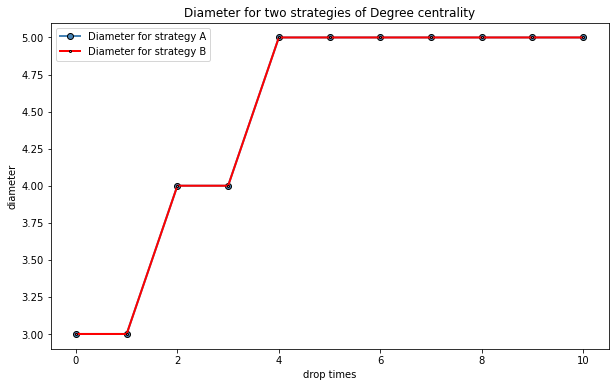

In [110]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result1.diameter_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Diameter for strategy A') 

plt.plot(range(11), 
         result1.diameter_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Diameter for strategy B') 

plt.title('Diameter for two strategies of Degree centrality')
plt.xlabel('drop times')
plt.ylabel('diameter')

plt.legend()

plt.show()

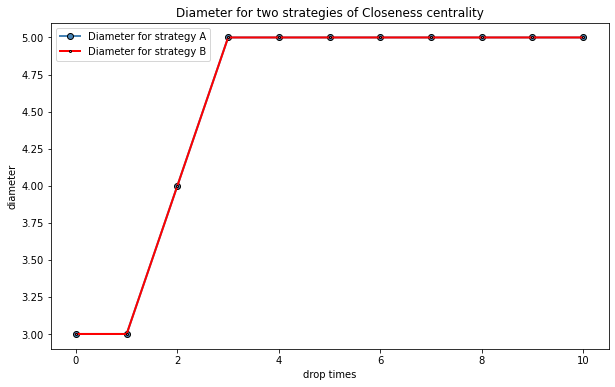

In [111]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result2.diameter_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Diameter for strategy A') 

plt.plot(range(11), 
         result2.diameter_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Diameter for strategy B') 

plt.title('Diameter for two strategies of Closeness centrality')
plt.xlabel('drop times')
plt.ylabel('diameter')

plt.legend()

plt.show()

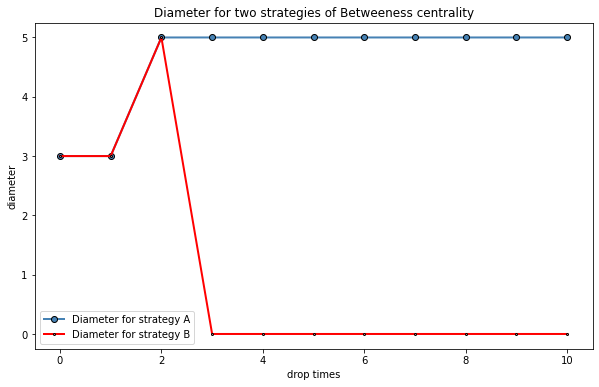

In [112]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result3.diameter_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Diameter for strategy A') 

plt.plot(range(11), 
         result3.diameter_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Diameter for strategy B') 

plt.title('Diameter for two strategies of Betweeness centrality')
plt.xlabel('drop times')
plt.ylabel('diameter')

plt.legend()

plt.show()

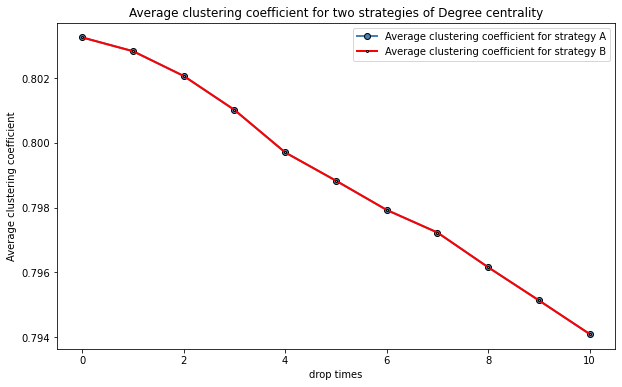

In [113]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result1.Avg_clustering_coefficient_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Average clustering coefficient for strategy A') 

plt.plot(range(11), 
         result1.Avg_clustering_coefficient_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Average clustering coefficient for strategy B') 

plt.title('Average clustering coefficient for two strategies of Degree centrality')
plt.xlabel('drop times')
plt.ylabel('Average clustering coefficient')

plt.legend()

plt.show()

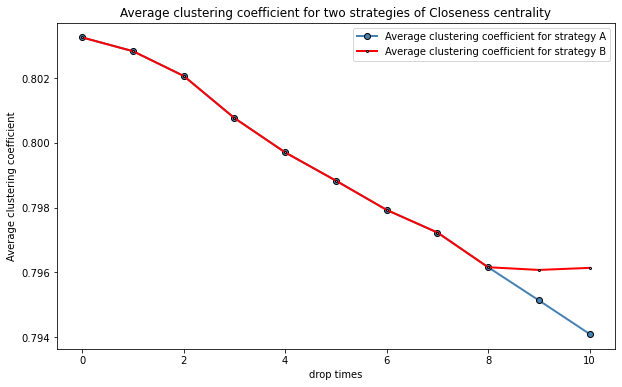

In [114]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result2.Avg_clustering_coefficient_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Average clustering coefficient for strategy A') 

plt.plot(range(11), 
         result2.Avg_clustering_coefficient_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Average clustering coefficient for strategy B') 

plt.title('Average clustering coefficient for two strategies of Closeness centrality')
plt.xlabel('drop times')
plt.ylabel('Average clustering coefficient')

plt.legend()

plt.show()

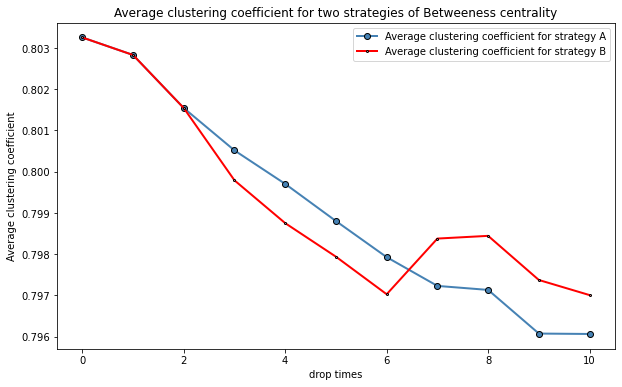

In [115]:
fig = plt.figure(figsize=(10,6))

plt.plot(range(11),
         result3.Avg_clustering_coefficient_A, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'Average clustering coefficient for strategy A') 

plt.plot(range(11), 
         result3.Avg_clustering_coefficient_B,
         linestyle = '-', 
         linewidth = 2, 
         color = 'r', 
         marker = 'o', 
         markersize = 2, 
         markeredgecolor='black', 
         markerfacecolor='#ff9999', 
         label = 'Average clustering coefficient for strategy B') 

plt.title('Average clustering coefficient for two strategies of Betweeness centrality')
plt.xlabel('drop times')
plt.ylabel('Average clustering coefficient')

plt.legend()

plt.show()

### II. Flows: weighted network
#### II.1.

In [116]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in lon_flows.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(lon_flows, v_weights, 'v_weights')

# Print edge list with attributes
list(lon_flows.edges(data = True))[0:10]

[('Abbey Road', 'Beckton', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'Blackwall', {'flows': 3, 'v_weights': 0.3333333}),
 ('Abbey Road', 'Canary Wharf', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Canning Town', {'flows': 5, 'v_weights': 0.2}),
 ('Abbey Road', 'Crossharbour', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'Cutty Sark', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Cyprus', {'flows': 7, 'v_weights': 0.1428571}),
 ('Abbey Road', 'Devons Road', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'East India', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Island Gardens', {'flows': 2, 'v_weights': 0.5})]

In [117]:
# Lets compute weighted closeness
clos_lon_weighted=nx.closeness_centrality(lon_flows, distance='v_weights')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(lon_flows,clos_lon_weighted,'closeness')

clos_lon = pd.DataFrame.from_dict(clos_lon_weighted,columns=['closeness'],orient='index')
clos_lon.head()

,closeness
Abbey Road,89.042502
Beckton,79.449569
Blackwall,116.553685
Canary Wharf,148.953875
Canning Town,136.301839


In [118]:
top_clo_weighted = clos_lon.sort_values(by='closeness',ascending=False)
top_clo_weighted.head(10)

,closeness
Waterloo,149.251767
Canary Wharf,148.953875
Bank and Monument,148.760204
Stratford,147.981808
Liverpool Street,146.945702
London Bridge,145.544617
Oxford Circus,143.964358
Farringdon,143.274247
King's Cross St. Pancras,141.512978
Victoria,141.438810


In [119]:
#Let us compute the betweenness centrality for the network 
bet_lon_weighted=nx.betweenness_centrality(lon_flows,weight='v_weights', normalized=False)

bet_lon = pd.DataFrame.from_dict(bet_lon_weighted,columns=['betweenness'],orient='index')[0:10]

bet_lon.head()



,betweenness
Abbey Road,0.0
Beckton,0.0
Blackwall,0.0
Canary Wharf,31998.0
Canning Town,3723.0


In [120]:
top_bet = bet_lon.sort_values(by='betweenness',ascending=False)
top_bet.head(10)

,betweenness
Canary Wharf,31998.0
Canning Town,3723.0
Abbey Road,0.0
Beckton,0.0
Blackwall,0.0
Crossharbour,0.0
Cutty Sark,0.0
Cyprus,0.0
Devons Road,0.0
East India,0.0


### II.2.

### II.3. 



In [121]:
lon7 = nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination')
lon_flows1 = nx.from_pandas_edgelist(London_clean, 'station_origin', 'station_destination','flows')
result_clo1 =pd.DataFrame(columns=('average_shortest_path_length','Avg_clustering_coefficient'))
result_clo2 =pd.DataFrame(columns=('weighted_average_shortest_path_length','weighted_Avg_clustering_coefficient'))

In [122]:
p = nx.average_shortest_path_length(lon7)

# let's measure the clustering coefficient
c = nx.clustering(lon7)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Average shortest path length: {p}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'average_shortest_path_length':p,'Avg_clustering_coefficient':c_avg}
result_clo1=result_clo1.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Average shortest path length: 1.6812652684075289
Avg clustering coefficient: 0.8032565130943028


In [123]:
lon7.remove_node('Stratford')
p = nx.average_shortest_path_length(lon7)

# let's measure the clustering coefficient
c = nx.clustering(lon7)

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Average shortest path length: {p}')
print(f'Avg clustering coefficient: {c_avg}')
a = {'average_shortest_path_length':p,'Avg_clustering_coefficient':c_avg}
result_clo1=result_clo1.append(a,ignore_index=True)

[('Brentwood', 1.0), ('Chadwell Heath', 1.0), ('Forest Gate', 1.0), ('Gidea Park', 1.0), ('Goodmayes', 1.0)]
Average shortest path length: 1.7039411749739206
Avg clustering coefficient: 0.8028316640744446


In [124]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in lon_flows1.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(lon_flows1, v_weights, 'v_weights')

# Print edge list with attributes
list(lon_flows1.edges(data = True))[0:10]

[('Abbey Road', 'Beckton', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'Blackwall', {'flows': 3, 'v_weights': 0.3333333}),
 ('Abbey Road', 'Canary Wharf', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Canning Town', {'flows': 5, 'v_weights': 0.2}),
 ('Abbey Road', 'Crossharbour', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'Cutty Sark', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Cyprus', {'flows': 7, 'v_weights': 0.1428571}),
 ('Abbey Road', 'Devons Road', {'flows': 1, 'v_weights': 1.0}),
 ('Abbey Road', 'East India', {'flows': 2, 'v_weights': 0.5}),
 ('Abbey Road', 'Island Gardens', {'flows': 2, 'v_weights': 0.5})]

In [125]:
p = nx.average_shortest_path_length(lon_flows1,weight='v_weights')
# let's measure the clustering coefficient
c = nx.clustering(lon_flows1,weight='v_weights')

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Weighted Average shortest path length: {p}')
print(f'Weighted Avg clustering coefficient: {c_avg}')
a = {'weighted_average_shortest_path_length':p,'weighted_Avg_clustering_coefficient':c_avg}
result_clo2=result_clo2.append(a,ignore_index=True)

[('Heathrow Terminal 4', 0.34390492689991986), ('Heathrow Terminal 5', 0.2948096662640694), ('Barkingside', 0.28182667788902827), ('North Ealing', 0.27787058056230457), ('Royal Oak', 0.27508650586047584)]
Weighted Average shortest path length: 0.012980423654797998
Weighted Avg clustering coefficient: 0.16291770716027407


In [126]:
lon_flows1.remove_node('Waterloo')
p = nx.average_shortest_path_length(lon_flows1,weight='v_weights')
# let's measure the clustering coefficient
c = nx.clustering(lon_flows1,weight='v_weights')

c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'Weighted Average shortest path length: {p}')
print(f'Weighted Avg clustering coefficient: {c_avg}')
a = {'weighted_average_shortest_path_length':p,'weighted_Avg_clustering_coefficient':c_avg}
result_clo2=result_clo2.append(a,ignore_index=True)

[('Heathrow Terminal 4', 0.3474544267569851), ('Heathrow Terminal 5', 0.296730184040235), ('Barkingside', 0.2846492777617734), ('North Ealing', 0.2785457004782704), ('Brent Cross', 0.27773844681721144)]
Weighted Average shortest path length: 0.013345891599877866
Weighted Avg clustering coefficient: 0.16399193227092188


In [127]:
result_clo1

,average_shortest_path_length,Avg_clustering_coefficient
0,1.681265,0.803257
1,1.703941,0.802832


In [128]:
result_clo2

,weighted_average_shortest_path_length,weighted_Avg_clustering_coefficient
0,0.01298,0.162918
1,0.013346,0.163992


## Part 2: Spatial Interaction models 
### III. Models and calibration 
#### III.1.calibration

In [129]:
London_network = London_network.drop( index = London_network.distance[London_network.distance == 0].index )
London_network = London_network.drop( index = London_network.population[London_network.population == 0].index )
London_network = London_network.drop( index = London_network.jobs[London_network.jobs == 0].index )

In [130]:
London_network.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [131]:
lon_flows = nx.from_pandas_edgelist(London_network, 'station_origin', 'station_destination','flows')

In [132]:
print(nx.info(lon_flows))

Graph with 398 nodes and 31677 edges


Text(0, 0.5, 'Total Flows')

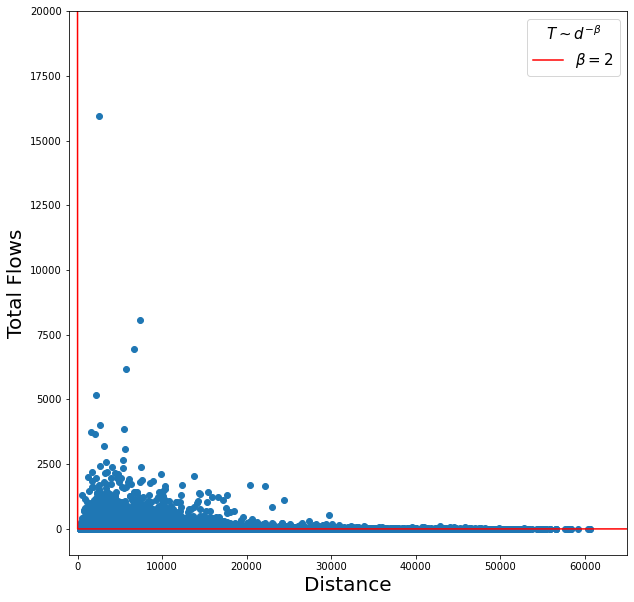

In [133]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = London_network["distance"], y=London_network["flows"])
#line plot
line = np.arange(0.0002, 65_000, 0.1)
ax.plot(line, line**-2, color ="r", label = "$\\beta=2$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,65000])
ax.set_ylim([-1000, 20000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total Flows')

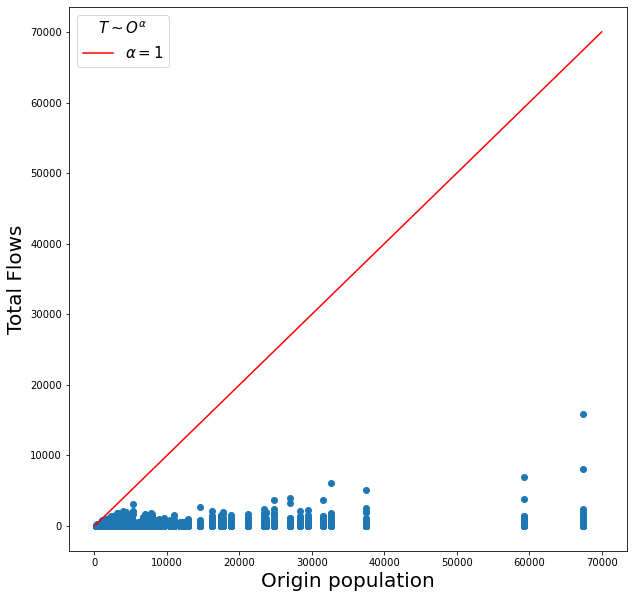

In [134]:
#Let us now look at the behaviour of the flows with respect to the population at the origin denoted by O
#and then fit a model line T ~ O^alpha, for alpha=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = London_network["population"], y=London_network["flows"])
#line plot
line = np.arange(0.0002, 70_000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\alpha=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim O^{\\alpha}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Origin population", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total')

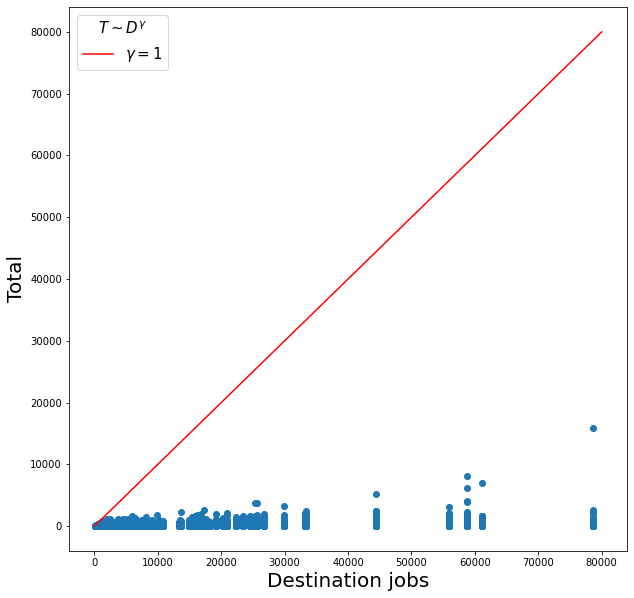

In [135]:
#Now let us look at the behaviour of the flows with respect to the salaries at destination denoted by D
# and then fit a model line  T ~ D^gamma. We will fit a line for gamma=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = London_network["jobs"], y=London_network["flows"])
#line plot
line = np.arange(0.0002, 80000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\gamma=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim D^{\\gamma}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Destination jobs", fontsize = 20)
ax.set_ylabel("Total", fontsize = 20)

In [136]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2


In [137]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    London_network[f"log_{x}"] = np.log(London_network[x])
    log_x_vars.append(f"log_{x}")

 ### Doubly Constrained Model

In [139]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=London_network, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Tue, 03 May 2022   Deviance:                   1.7693e+06
Time:                        00:14:43   Pearson chi2:                 2.47e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [140]:
#get the estimates
London_network["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
submat7 = London_network.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
submat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [141]:
CalcRSqaured(London_network["flows"],London_network["doubsimfitted"])

0.4076853229296066

In [142]:
CalcRMSE(London_network["flows"],London_network["doubsimfitted"])

101.335

In [143]:
-doubSim.params['log_distance']

0.9096317604932751

In [144]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows ~ station_destination + station_origin + distance -1"
doubsim1 = smf.glm(formula=doubsim_form, data = London_network, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Tue, 03 May 2022   Deviance:                   1.5299e+06
Time:                        00:15:26   Pearson chi2:                 2.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [145]:
London_network["doubsimfitted1"] = np.round(doubsim1.mu,0)

In [146]:
CalcRSqaured(London_network["flows"],London_network["doubsimfitted1"])

0.4978427414632328

In [147]:
CalcRMSE(London_network["flows"],London_network["doubsimfitted1"])

93.401

In [148]:
-doubsim1.params['distance']

0.00015436969215685994

## IV. Scenarios
### IV.1. Scenario A:

In [149]:
London_network.jobs[London_network.station_destination.str.contains('Canary Wharf')]

3        58772
126      58772
348      58772
595      58772
817      58772
         ...  
60595    58772
60838    58772
61062    58772
61294    58772
61442    58772
Name: jobs, Length: 304, dtype: int64

In [150]:
London_network

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubsimfitted,doubsimfitted1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,2.0,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,77.0,112.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,45.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,257.0,185.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,152.0,176.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,20.0,27.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,115.0,132.0


In [151]:
London_network['jobs1']=London_network['jobs']

In [152]:
London_network['jobs1'] = London_network['jobs1'].map(lambda x: x+ 74)

In [153]:
London_network['jobs1']=London_network['jobs1'].replace(58846, 58772/2)

In [154]:
London_network['jobs1']=London_network['jobs1'].replace(78623, 78623+8)

In [155]:
London_network

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubsimfitted,doubsimfitted1,jobs1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78631
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,516
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,739
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,29386
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,15502
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,257.0,185.0,3416
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,152.0,176.0,5561
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,20.0,27.0,474
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,115.0,132.0,967


In [156]:
x_variables = ["jobs1"]
log_x_vars = []
for x in x_variables:
    London_network[f"log_{x}"] = np.log(London_network[x])
    log_x_vars.append(f"log_{x}")


In [157]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=London_network, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 03 May 2022   Deviance:                   1.8615e+06
Time:                        00:15:46   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [158]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
London_network = London_network.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
London_network.drop(columns = ["coef"], inplace = True)
#check this has worked
London_network.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubsimfitted,doubsimfitted1,jobs1,log_jobs1,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78631,11.272521,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,516,6.246107,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,739,6.605298,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,29386,10.288274,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,15502,9.648724,3.250242


In [159]:
alpha_i = prodSim.params[0:397]
gamma = prodSim.params[398]
beta = -prodSim.params[399]

In [160]:
beta

0.8781191183724272

In [161]:
London_network["prodsimest1"] = np.exp(London_network["alpha_i"]+gamma*London_network["log_jobs"] 
                                 - beta*London_network["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
London_network.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubsimfitted,doubsimfitted1,jobs1,log_jobs1,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78631,11.272521,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,516,6.246107,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,739,6.605298,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,29386,10.288274,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,15502,9.648724,3.250242,49.060970
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.0,5.0,1282,7.156177,3.250242,2.639418
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,4.0,5.0,919,6.823286,3.250242,3.275120
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,5.0,6.0,1822,7.507690,3.250242,2.838948
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,4.0,5.0,924,6.828712,3.250242,2.056310
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,3.0,4.0,685,6.529419,3.250242,2.476929


In [162]:
#first round the estimates
London_network["prodsimest1"] = round(London_network["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
submat3 = London_network.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
submat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [163]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [164]:
CalcRSquared(London_network["flows"], London_network["prodsimest1"])

0.3882763950178628

In [165]:
CalcRMSE(London_network["flows"], London_network["prodsimest1"])

102.893

In [166]:
London_network["prodsimest2"] = np.exp(London_network["alpha_i"]+gamma*London_network["log_jobs1"] 
                                 - beta*London_network["log_distance"])

London_network["prodsimest2"] = round(London_network["prodsimest2"],0)
#now we can convert the pivot table into a matrix
submat4 = London_network.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
submat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,579.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1260.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3772.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,33.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.0
Woodside Park,NaN,NaN,6.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3101.0


In [167]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = London_network["jobs1"]**gamma
dist_beta = London_network["distance"]**-beta
#calcualte the first stage of the Ai values
London_network["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(London_network.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
London_network = London_network.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [168]:
#to check everything works, recreate the original estimates
London_network["prodsimest4"] = London_network["A_i2"]*London_network["population"]*Dj3_gamma*dist_beta
#round
London_network["prodsimest4"] = round(London_network["prodsimest4"])

In [169]:
ScenarioA = London_network.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioA

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3738.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,33.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,6.0,20.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3095.0


In [170]:
sum(London_network.flows[London_network.station_destination.str.contains('Canary Wharf')])

58772

In [171]:
ScenarioA['Canary Wharf']

station_origin
Abbey Road             40.0
Acton Central           NaN
Acton Town             42.0
Aldgate                34.0
Aldgate East           48.0
                     ...   
Woodford              109.0
Woodgrange Park         NaN
Woodside Park          45.0
Woolwich Arsenal      894.0
All                 30825.0
Name: Canary Wharf, Length: 399, dtype: float64

### IV.2. Scenario B:

In [172]:
London_network['distance1']=London_network['distance']

In [173]:
London_network['distance1'] = London_network['distance1'].map(lambda x: x * 2)

In [174]:
London_network['distance2']=London_network['distance']

In [175]:
London_network['distance2'] = London_network['distance2'].map(lambda x: x * 5)

In [176]:
London_network

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubsimfitted,...,jobs1,log_jobs1,alpha_i,prodsimest1,prodsimest2,Ai1,A_i2,prodsimest4,distance1,distance2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,...,78631,11.272521,3.250242,55.0,55.0,2.134190,0.044627,57.0,16263.050194,40657.625484
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,2.0,...,516,6.246107,3.250242,1.0,1.0,0.043056,0.044627,1.0,17020.243548,42550.608870
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,...,739,6.605298,3.250242,3.0,3.0,0.115846,0.044627,3.0,7550.897744,18877.244360
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,77.0,...,29386,10.288274,3.250242,66.0,39.0,1.512182,0.044627,40.0,10173.028439,25432.571098
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,45.0,...,15502,9.648724,3.250242,49.0,49.0,1.908847,0.044627,51.0,4457.846335,11144.615837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,257.0,...,3416,8.136226,6.905590,121.0,123.0,0.123531,0.134037,131.0,26803.591098,67008.977744
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,152.0,...,5561,8.623533,6.905590,259.0,262.0,0.262514,0.134037,278.0,17402.908722,43507.271804
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,20.0,...,474,6.161207,6.905590,32.0,36.0,0.036497,0.134037,39.0,19073.440902,47683.602256
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,115.0,...,967,6.874198,6.905590,98.0,105.0,0.104793,0.134037,111.0,10710.497108,26776.242771


In [177]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance","distance1","distance2"]
log_x_vars = []
for x in x_variables:
    London_network[f"log_{x}"] = np.log(London_network[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=London_network, 
                  family=sm.families.Poisson()).fit()

In [178]:
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Tue, 03 May 2022   Deviance:                   2.3848e+06
Time:                        00:15:48   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

In [179]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
London_network["unconstrainedEst2"] = np.exp(K 
                                       + alpha*London_network["log_population"] 
                                       + gamma*London_network["log_jobs"] 
                                       - beta*London_network["log_distance"])

In [180]:
beta

0.6228020552901643

In [181]:
#round the numbers so that we don't get a half of a person
London_network["unconstrainedEst2"] = round(London_network["unconstrainedEst2"], 0)
#convert to integers
London_network["unconstrainedEst2"] = London_network["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(London_network["unconstrainedEst2"])

1542355

In [182]:
submat2 = London_network.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
submat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [183]:
CalcRSqaured(London_network["flows"], London_network["unconstrainedEst2"])

0.3211903577361869

In [184]:
CalcRMSE(London_network["flows"], London_network["unconstrainedEst2"])

108.334

In [185]:
London_network["unconstrainedEst3"] = np.exp(K 
                                       + alpha*London_network["log_population"] 
                                       + gamma*London_network["log_jobs"] 
                                       - beta*London_network["log_distance1"])
#round the numbers so that we don't get a half of a person
London_network["unconstrainedEst3"] = round(London_network["unconstrainedEst3"], 0)
#convert to integers
London_network["unconstrainedEst3"] = London_network["unconstrainedEst3"].astype(int)
#check that the sum of these estimates make sense
sum(London_network["unconstrainedEst3"])

1001572

In [186]:
ScenarioB1 = London_network.pivot_table(values ="unconstrainedEst3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioB1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,254
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,218
Acton Town,NaN,NaN,NaN,13.0,14.0,NaN,5.0,1.0,NaN,15.0,...,12.0,2.0,4.0,7.0,NaN,1.0,NaN,2.0,NaN,2507
Aldgate,NaN,NaN,4.0,NaN,52.0,NaN,NaN,0.0,NaN,30.0,...,9.0,NaN,5.0,4.0,NaN,2.0,NaN,2.0,NaN,3974
Aldgate East,NaN,NaN,5.0,55.0,NaN,NaN,2.0,0.0,NaN,31.0,...,9.0,2.0,5.0,4.0,NaN,2.0,NaN,2.0,NaN,4196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,4.0,17.0,18.0,NaN,NaN,NaN,NaN,16.0,...,9.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2403
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
Woodside Park,NaN,NaN,3.0,12.0,12.0,NaN,1.0,NaN,NaN,13.0,...,7.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1722


In [187]:
London_network["unconstrainedEst4"] = np.exp(K 
                                       + alpha*London_network["log_population"] 
                                       + gamma*London_network["log_jobs"] 
                                       - beta*London_network["log_distance2"])
#round the numbers so that we don't get a half of a person
London_network["unconstrainedEst4"] = round(London_network["unconstrainedEst4"], 0)
#convert to integers
London_network["unconstrainedEst4"] = London_network["unconstrainedEst4"].astype(int)
#check that the sum of these estimates make sense
sum(London_network["unconstrainedEst4"])

565727

In [188]:
ScenarioB2 = London_network.pivot_table(values ="unconstrainedEst4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioB2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,147
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,117
Acton Town,NaN,NaN,NaN,8.0,8.0,NaN,3.0,0.0,NaN,8.0,...,7.0,1.0,2.0,4.0,NaN,1.0,NaN,1.0,NaN,1419
Aldgate,NaN,NaN,2.0,NaN,30.0,NaN,NaN,0.0,NaN,17.0,...,5.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2239
Aldgate East,NaN,NaN,3.0,31.0,NaN,NaN,1.0,0.0,NaN,18.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,10.0,10.0,NaN,NaN,NaN,NaN,9.0,...,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1361
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
Woodside Park,NaN,NaN,2.0,7.0,7.0,NaN,1.0,NaN,NaN,8.0,...,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,973


### IV.3. 

In [189]:
submat= London_network.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
submat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [190]:
Canary_Wharf =pd.DataFrame(columns=('Scenario','flows_to_Canary_Wharf'))
total_flows =pd.DataFrame(columns=('Scenario','total_flows'))

In [191]:
submat['Canary Wharf']

station_origin
Abbey Road              1.0
Acton Central           NaN
Acton Town             57.0
Aldgate                 1.0
Aldgate East            3.0
                     ...   
Woodford              192.0
Woodgrange Park         NaN
Woodside Park          42.0
Woolwich Arsenal       82.0
All                 58772.0
Name: Canary Wharf, Length: 399, dtype: float64

In [192]:
submat['All']

station_origin
Abbey Road              599
Acton Central          1224
Acton Town             3745
Aldgate                2886
Aldgate East           3172
                     ...   
Woodford               4868
Woodgrange Park         530
Woodside Park          3093
Woolwich Arsenal       7892
All                 1542283
Name: All, Length: 399, dtype: int64

In [193]:
a = {'Scenario':'original','flows_to_Canary_Wharf':58772}
Canary_Wharf=Canary_Wharf.append(a,ignore_index=True)
b = {'Scenario':'original','total_flows':1542283}
total_flows=total_flows.append(b,ignore_index=True)

In [194]:
ScenarioA['Canary Wharf']

station_origin
Abbey Road             40.0
Acton Central           NaN
Acton Town             42.0
Aldgate                34.0
Aldgate East           48.0
                     ...   
Woodford              109.0
Woodgrange Park         NaN
Woodside Park          45.0
Woolwich Arsenal      894.0
All                 30825.0
Name: Canary Wharf, Length: 399, dtype: float64

In [195]:
ScenarioA['All']

station_origin
Abbey Road              598.0
Acton Central          1226.0
Acton Town             3738.0
Aldgate                2883.0
Aldgate East           3172.0
                      ...    
Woodford               4862.0
Woodgrange Park         530.0
Woodside Park          3095.0
Woolwich Arsenal       7896.0
All                 1541896.0
Name: All, Length: 399, dtype: float64

In [196]:
a = {'Scenario':'ScenarioA','flows_to_Canary_Wharf':30825}
Canary_Wharf=Canary_Wharf.append(a,ignore_index=True)
b = {'Scenario':'ScenarioA','total_flows':1541896}
total_flows=total_flows.append(b,ignore_index=True)

In [197]:
ScenarioB1['Canary Wharf']

station_origin
Abbey Road             35.0
Acton Central           NaN
Acton Town             56.0
Aldgate                93.0
Aldgate East          117.0
                     ...   
Woodford               86.0
Woodgrange Park         NaN
Woodside Park          46.0
Woolwich Arsenal      151.0
All                 28476.0
Name: Canary Wharf, Length: 399, dtype: float64

In [198]:
ScenarioB1['All']

station_origin
Abbey Road              254
Acton Central           218
Acton Town             2507
Aldgate                3974
Aldgate East           4196
                     ...   
Woodford               2403
Woodgrange Park          43
Woodside Park          1722
Woolwich Arsenal        837
All                 1001572
Name: All, Length: 399, dtype: int32

In [199]:
a = {'Scenario':'ScenarioB1','flows_to_Canary_Wharf':28476}
Canary_Wharf=Canary_Wharf.append(a,ignore_index=True)
b = {'Scenario':'ScenarioB1','total_flows':1001572}
total_flows=total_flows.append(b,ignore_index=True)

In [200]:
ScenarioB2['Canary Wharf']

station_origin
Abbey Road             20.0
Acton Central           NaN
Acton Town             32.0
Aldgate                53.0
Aldgate East           66.0
                     ...   
Woodford               48.0
Woodgrange Park         NaN
Woodside Park          26.0
Woolwich Arsenal       86.0
All                 16081.0
Name: Canary Wharf, Length: 399, dtype: float64

In [201]:
ScenarioB2['All']

station_origin
Abbey Road             147
Acton Central          117
Acton Town            1419
Aldgate               2239
Aldgate East          2370
                     ...  
Woodford              1361
Woodgrange Park         17
Woodside Park          973
Woolwich Arsenal       475
All                 565727
Name: All, Length: 399, dtype: int32

In [202]:
a = {'Scenario':'ScenarioB2','flows_to_Canary_Wharf':16081}
Canary_Wharf=Canary_Wharf.append(a,ignore_index=True)
b = {'Scenario':'ScenarioB2','total_flows':565727}
total_flows=total_flows.append(b,ignore_index=True)

In [203]:
Canary_Wharf

,Scenario,flows_to_Canary_Wharf
0,original,58772
1,ScenarioA,30825
2,ScenarioB1,28476
3,ScenarioB2,16081


In [204]:
total_flows

,Scenario,total_flows
0,original,1542283
1,ScenarioA,1541896
2,ScenarioB1,1001572
3,ScenarioB2,565727


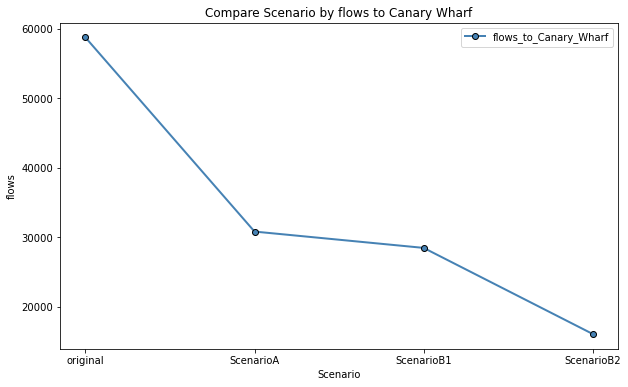

In [205]:
fig = plt.figure(figsize=(10,6))

plt.plot(Canary_Wharf.Scenario,
         Canary_Wharf.flows_to_Canary_Wharf, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'flows_to_Canary_Wharf') 

plt.title('Compare Scenario by flows to Canary Wharf')
plt.xlabel('Scenario')
plt.ylabel('flows')

plt.legend()

plt.show()

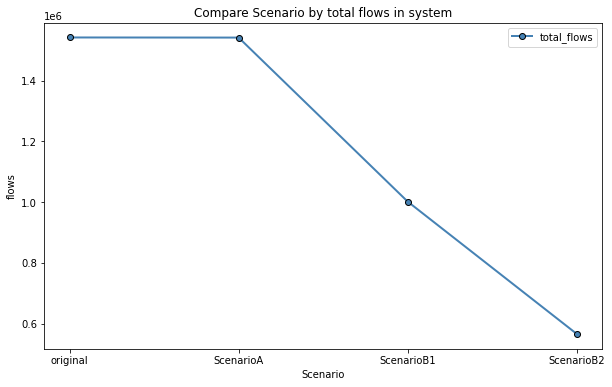

In [206]:
fig = plt.figure(figsize=(10,6))

plt.plot(total_flows.Scenario,
         total_flows.total_flows, 
         linestyle = '-', 
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6,
         markeredgecolor='black', 
         markerfacecolor='steelblue', 
         label = 'total_flows') 

plt.title('Compare Scenario by total flows in system')
plt.xlabel('Scenario')
plt.ylabel('flows')

plt.legend()

plt.show()